In [199]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

***Q1- Please refer the table below to answer below questions:***

|PlannPlanned to purchase Product A|Actually placed order for Product A - Yes|Actually placed order for Product A - No | Total |
|-------|------|-----------|-------|
|  Yes  | 400  |   100     | 500   |
|-------|------|-----------|-------|
|  No   | 200  |   1300    | 1500  |
|-------|------|-----------|-------|
|  Total| 600  |   1400    | 2000  |


**1.A. Refer above table and find the joint probability of the people who planned to purchase and actually placed an order.**

We can observe from the above table, that 400 people planned to purchase and actually placed an order for Product A is 400 out of 2000 people.

In [200]:
AP = 400    # AP is the number of people who planned and actually placed an order for product A
TP = 2000   # TP is the total number of people 
P = round(AP / TP,4) 
print('Joint probability of the people who planned to purchase and actually placed an order. is %1.4f' % P)

Joint probability of the people who planned to purchase and actually placed an order. is 0.2000


**1.B. Refer to the above table and find the joint probability of the people who planned to purchase and actually placed an order, given that
people planned to purchase.**

In [201]:
# P1 = P(Actually placed an order | Planned to purchase)
# P2 = Planned to purchase and actually placed an order
# P3 = Planned to purchase

# Probability of A given B is written as P(A | B).

# P(A∣B)=P(AandB)P(B)
# where P(A and B) = Joint probability of A and B

# P(A) = Marginal probability of A
# P(B) = Marginal probability of B
# p1 = P2 / P3

P1   = (400 / 2000 )/ (500 / 2000)
print('P(Actually placed an order | Planned to purchase) is %1.4f' % P1) 

P(Actually placed an order | Planned to purchase) is 0.8000


***2. An electrical manufacturing company conducts quality checks at specified periods on the products it manufactures. Historically, the
failure rate for the manufactured item is 5%. Suppose a random sample of 10 manufactured items is selected. Answer the following
questions.***

**2.A. Probability that none of the items are defective?**

In [202]:
p   =  0.05 # failure rate  manufacturing company is 5%
n   =  10 # sample size of manufactured items
k   =  np.arange(0,11) # An array of quantiles
binomial = stats.binom.pmf(k,n,p)
print(binomial)

[5.98736939e-01 3.15124705e-01 7.46347985e-02 1.04750594e-02
 9.64808106e-04 6.09352488e-05 2.67259863e-06 8.03789063e-08
 1.58642578e-09 1.85546875e-11 9.76562500e-14]


In [203]:
print(f'None of the LED bulbs are defective is {round(binomial[0], 4)}')

None of the LED bulbs are defective is 0.5987


**2.B. Probability that exactly one of the items is defective?**

In [204]:
print(f'Exactly one of the items is defective {round(binomial[1], 4)}')

Exactly one of the items is defective 0.3151


**2.C. Probability that two or fewer of the items are defective?**

We need to calculate cumulative probability of Upto Two items being defective

In [205]:
cumbinomial = stats.binom.cdf(k,n,p)
print(cumbinomial)

[0.59873694 0.91386164 0.98849644 0.9989715  0.99993631 0.99999725
 0.99999992 1.         1.         1.         1.        ]


In [206]:
print('Two or fewer of the items are defective? is %1.4f' %cumbinomial[2])

Two or fewer of the items are defective? is 0.9885


**2.D. Probability that three or more of the items are defective ?**

To get 3 or more defective items, we need to subtract cumulative Probability upto 2 defective items from 1.

In [207]:
P = 1- cumbinomial[2]
print('Probability that three or more of the items are defective is %1.4f' % P)

Probability that three or more of the items are defective is 0.0115


**Plot the binomial distribution function**

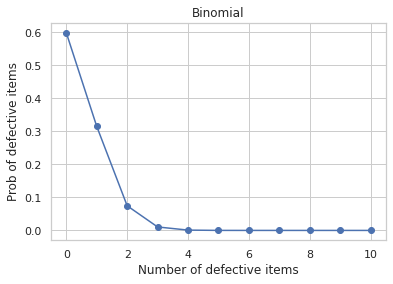

In [208]:
plt.plot(k,binomial, 'o-')
plt.title('Binomial')
plt.xlabel('Number of defective items')
plt.ylabel('Prob of defective items')
plt.show()

**3. A car salesman sells on an average 3 cars per week.**

***3.A. What is Probability that in a given week he will sell some cars?***

In [209]:
rate =  3 # Average 3 cars per week
k    =  np.arange(0,16)
cumpoisson = stats.poisson.cdf(k,rate)
print(cumpoisson)

[0.04978707 0.19914827 0.42319008 0.64723189 0.81526324 0.91608206
 0.96649146 0.9880955  0.99619701 0.99889751 0.99970766 0.99992861
 0.99998385 0.9999966  0.99999933 0.99999988]


In [210]:
# P = probability that the salesman sells some cars
P   = 1 - cumpoisson[0]
print('Probability that the salesman sells some cars is %1.4f' % P)

Probability that the salesman sells some cars is 0.9502


***3.B. What is Probability that in a given week he will sell 2 or more but less than 5 cars?***

In [211]:
# Let P1 be the probability that the saleaman sells more than 4 cars
P1 = cumpoisson[4] # P(X >=4)
# Let P2 be the probability that the salesman sells more than 1 cars
P2 = cumpoisson[1] # P(X >=1)
P = P1 - P2 # Prob. that the salesman will sell between 2 and 5 cars
print('Probability that the salesman sells between 2 and 5 car is %1.4f' % P)

Probability that the salesman sells between 2 and 5 car is 0.6161


***3.C. Plot the poisson distribution function for cumulative probability of cars sold per-week vs number of cars sold per week.***

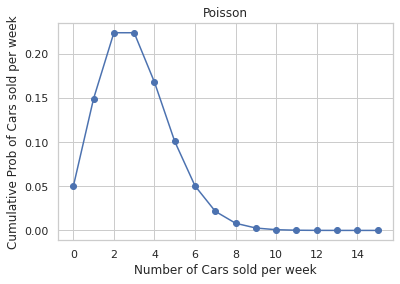

In [212]:
poisson = stats.poisson.pmf(k,rate)
plt.plot(k,poisson, 'o-')
plt.title('Poisson')
plt.xlabel('Number of Cars sold per week')
plt.ylabel('Cumulative Prob of Cars sold per week')
plt.show()

**4. Accuracy in understanding orders for a speech based bot at a restaurant is important for the Company X which has designed,
marketed and launched the product for a contactless delivery due to the COVID-19 pandemic. Recognition accuracy that measures the
percentage of orders that are taken correctly is 86.8%. Suppose that you place an order with the bot and two friends of yours
independently place orders with the same bot. Answer the following questions.**

***4.A. What is the probability that all three orders will be recognised correctly?***

In [213]:
p   =  0.868 # probability of a correct order taken is 0.868
n   =  3 # sample size of manufactured items
k   =  np.arange(0,4) # An array of quantiles
binom = stats.binom.pmf(k,n,p)
print(binom)

[0.00229997 0.0453721  0.2983559  0.65397203]


In [214]:

print(f'Probability that all three orders will be recognised correctly {round(binom[3], 4)}')

Probability that all three orders will be recognised correctly 0.654


***4.B. What is the probability that none of the three orders will be recognised correctly?***

In [215]:
print(f'Probability that none of three orders will be recognised correctly {round(binom[0], 4)}')

Probability that none of three orders will be recognised correctly 0.0023


***4.C. What is the probability that at least two of the three orders will be recognised correctly?***

In [216]:
print(f'Probability that atleast two of three will be recognised correctly {round(binom[2] + binom[3], 4)}')

Probability that atleast two of three will be recognised correctly 0.9523


## **5. Explain 1 real life industry scenario (other than the ones mentioned above) where you can use the concepts learnt in this module of Applied Statistics to get data driven business solution.**

I work for an organization where the company sells new and used car. we have customer and sale data available from online portal and offline showrooms.

There are multiple bussiness scenarios that can be solve using applied Statics. Few of them has been given below

1- Which colors of car is male and females customers choose to buy.
2- Which day/hour of the week/day customers choose to visit showroom.
3- Which type of car make/model male customers vs female customer prefer to buy.
4- Does people tends to by car on their birthdays

etc 


**PART B**

Reading the data files

In [217]:
# Mount the google drive. this is additional configuration needed if we use google colabs 
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [218]:
# Change dir path
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/Projects/Applied_Statistics')
print(os.getcwd())

/content/drive/My Drive/Colab Notebooks/Projects/Applied_Statistics


In [219]:
# The the data file
basket_ball = pd.read_csv("Basketball.csv")

# Get the highlight of the dataset to understand the dataset

In [220]:
basket_ball.head()

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931to32,1
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1


In [221]:
basket_ball.shape

(61, 13)

Get the basic details of 

In [222]:
basket_ball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Team                 61 non-null     object
 1   Tournament           61 non-null     int64 
 2   Score                61 non-null     object
 3   PlayedGames          61 non-null     object
 4   WonGames             61 non-null     object
 5   DrawnGames           61 non-null     object
 6   LostGames            61 non-null     object
 7   BasketScored         61 non-null     object
 8   BasketGiven          61 non-null     object
 9   TournamentChampion   61 non-null     object
 10  Runner-up            61 non-null     object
 11  TeamLaunch           61 non-null     object
 12  HighestPositionHeld  61 non-null     int64 
dtypes: int64(2), object(11)
memory usage: 6.3+ KB


The the basic details of the dataset by decribing the data

In [223]:
basket_ball.describe()

,Tournament,HighestPositionHeld
count,61.000000,61.000000
mean,24.000000,7.081967
std,26.827225,5.276663
min,1.000000,1.000000
25%,4.000000,3.000000
50%,12.000000,6.000000
75%,38.000000,10.000000
max,86.000000,20.000000


In [224]:
basket_ball.isnull().sum()

Team                   0
Tournament             0
Score                  0
PlayedGames            0
WonGames               0
DrawnGames             0
LostGames              0
BasketScored           0
BasketGiven            0
TournamentChampion     0
Runner-up              0
TeamLaunch             0
HighestPositionHeld    0
dtype: int64

There are null values in our dataset in form of ‘-’ only but pandas are not reading them so we will replace them into np.nan form.

In [225]:
basket_ball.replace({'-': np.nan}, inplace=True)

In [226]:
basket_ball.isnull().sum()

Team                    0
Tournament              0
Score                   1
PlayedGames             1
WonGames                1
DrawnGames              1
LostGames               1
BasketScored            1
BasketGiven             1
TournamentChampion     52
Runner-up              48
TeamLaunch              0
HighestPositionHeld     0
dtype: int64

In [227]:
# Treat the TeamLaunch variable
basket_ball['TeamLaunch'] = basket_ball['TeamLaunch'].str[:4].astype(int)

In [228]:
# Drop the categorical variable team
team = basket_ball['Team']
basket_ball_without_team = basket_ball.drop(['Team'], axis=1)
basket_ball_without_team

,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1
1,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1
2,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1
3,82,3386,2664,1187,616,861,4398,3469,6,6,1931,1
4,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1
...,...,...,...,...,...,...,...,...,...,...,...,...
56,1,34,38,8,10,20,38,66,NaN,NaN,2009,20
57,1,22,30,7,8,15,37,57,NaN,NaN,1956,16
58,1,19,30,7,5,18,51,85,NaN,NaN,1951,16
59,1,14,30,5,4,21,34,65,NaN,NaN,1955,15


In [229]:
#  Handlling the missing value usinh Imputation technique
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
final_basket_ball = pd.DataFrame(imp.fit_transform(basket_ball_without_team), columns = basket_ball_without_team.columns) #only apply imputer to numeric columns


In [230]:
final_basket_ball.apply(pd.to_numeric,errors='ignore')


,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1
1,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1
2,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1
3,82,3386,2664,1187,616,861,4398,3469,6,6,1931,1
4,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1
...,...,...,...,...,...,...,...,...,...,...,...,...
56,1,34,38,8,10,20,38,66,1,1,2009,20
57,1,22,30,7,8,15,37,57,1,1,1956,16
58,1,19,30,7,5,18,51,85,1,1,1951,16
59,1,14,30,5,4,21,34,65,1,1,1955,15


In [231]:
final_basket_ball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Tournament           61 non-null     object
 1   Score                61 non-null     object
 2   PlayedGames          61 non-null     object
 3   WonGames             61 non-null     object
 4   DrawnGames           61 non-null     object
 5   LostGames            61 non-null     object
 6   BasketScored         61 non-null     object
 7   BasketGiven          61 non-null     object
 8   TournamentChampion   61 non-null     object
 9   Runner-up            61 non-null     object
 10  TeamLaunch           61 non-null     object
 11  HighestPositionHeld  61 non-null     object
dtypes: object(12)
memory usage: 5.8+ KB


In [232]:

final_basket_ball["Team"] = team


In [233]:
object_col = ["Team"]
for col in final_basket_ball.columns:
  if col not in object_col:
    final_basket_ball[col] = final_basket_ball[col].astype('int64')

**1. Read the data set, clean the data and prepare final dataset to be used for analysis.**

In [234]:
# Displaying final dataset that can be used for analysis
final_basket_ball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Tournament           61 non-null     int64 
 1   Score                61 non-null     int64 
 2   PlayedGames          61 non-null     int64 
 3   WonGames             61 non-null     int64 
 4   DrawnGames           61 non-null     int64 
 5   LostGames            61 non-null     int64 
 6   BasketScored         61 non-null     int64 
 7   BasketGiven          61 non-null     int64 
 8   TournamentChampion   61 non-null     int64 
 9   Runner-up            61 non-null     int64 
 10  TeamLaunch           61 non-null     int64 
 11  HighestPositionHeld  61 non-null     int64 
 12  Team                 61 non-null     object
dtypes: int64(12), object(1)
memory usage: 6.3+ KB


In [235]:
final_basket_ball.describe().T

,count,mean,std,min,25%,50%,75%,max
Tournament,61.0,24.000000,26.827225,1.0,4.0,12.0,38.0,86.0
Score,61.0,918.147541,1128.894708,14.0,107.0,416.0,1351.0,4385.0
PlayedGames,61.0,842.098361,905.301436,30.0,116.0,426.0,1428.0,2762.0
WonGames,61.0,304.081967,406.904874,5.0,34.0,123.0,426.0,1647.0
DrawnGames,61.0,189.163934,201.588870,4.0,24.0,95.0,330.0,633.0
LostGames,61.0,304.360656,294.110469,15.0,62.0,197.0,563.0,1070.0
BasketScored,61.0,1141.491803,1505.883657,34.0,153.0,430.0,1642.0,5947.0
BasketGiven,61.0,1156.983607,1154.340338,55.0,241.0,633.0,1951.0,3889.0
TournamentChampion,61.0,2.278689,5.253986,1.0,1.0,1.0,1.0,33.0
Runner-up,61.0,2.196721,4.304338,1.0,1.0,1.0,1.0,25.0


**Display the distribution of the data to assess the central tendency, variability, and shape**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1e01ad46d0>,
      dtype=object)

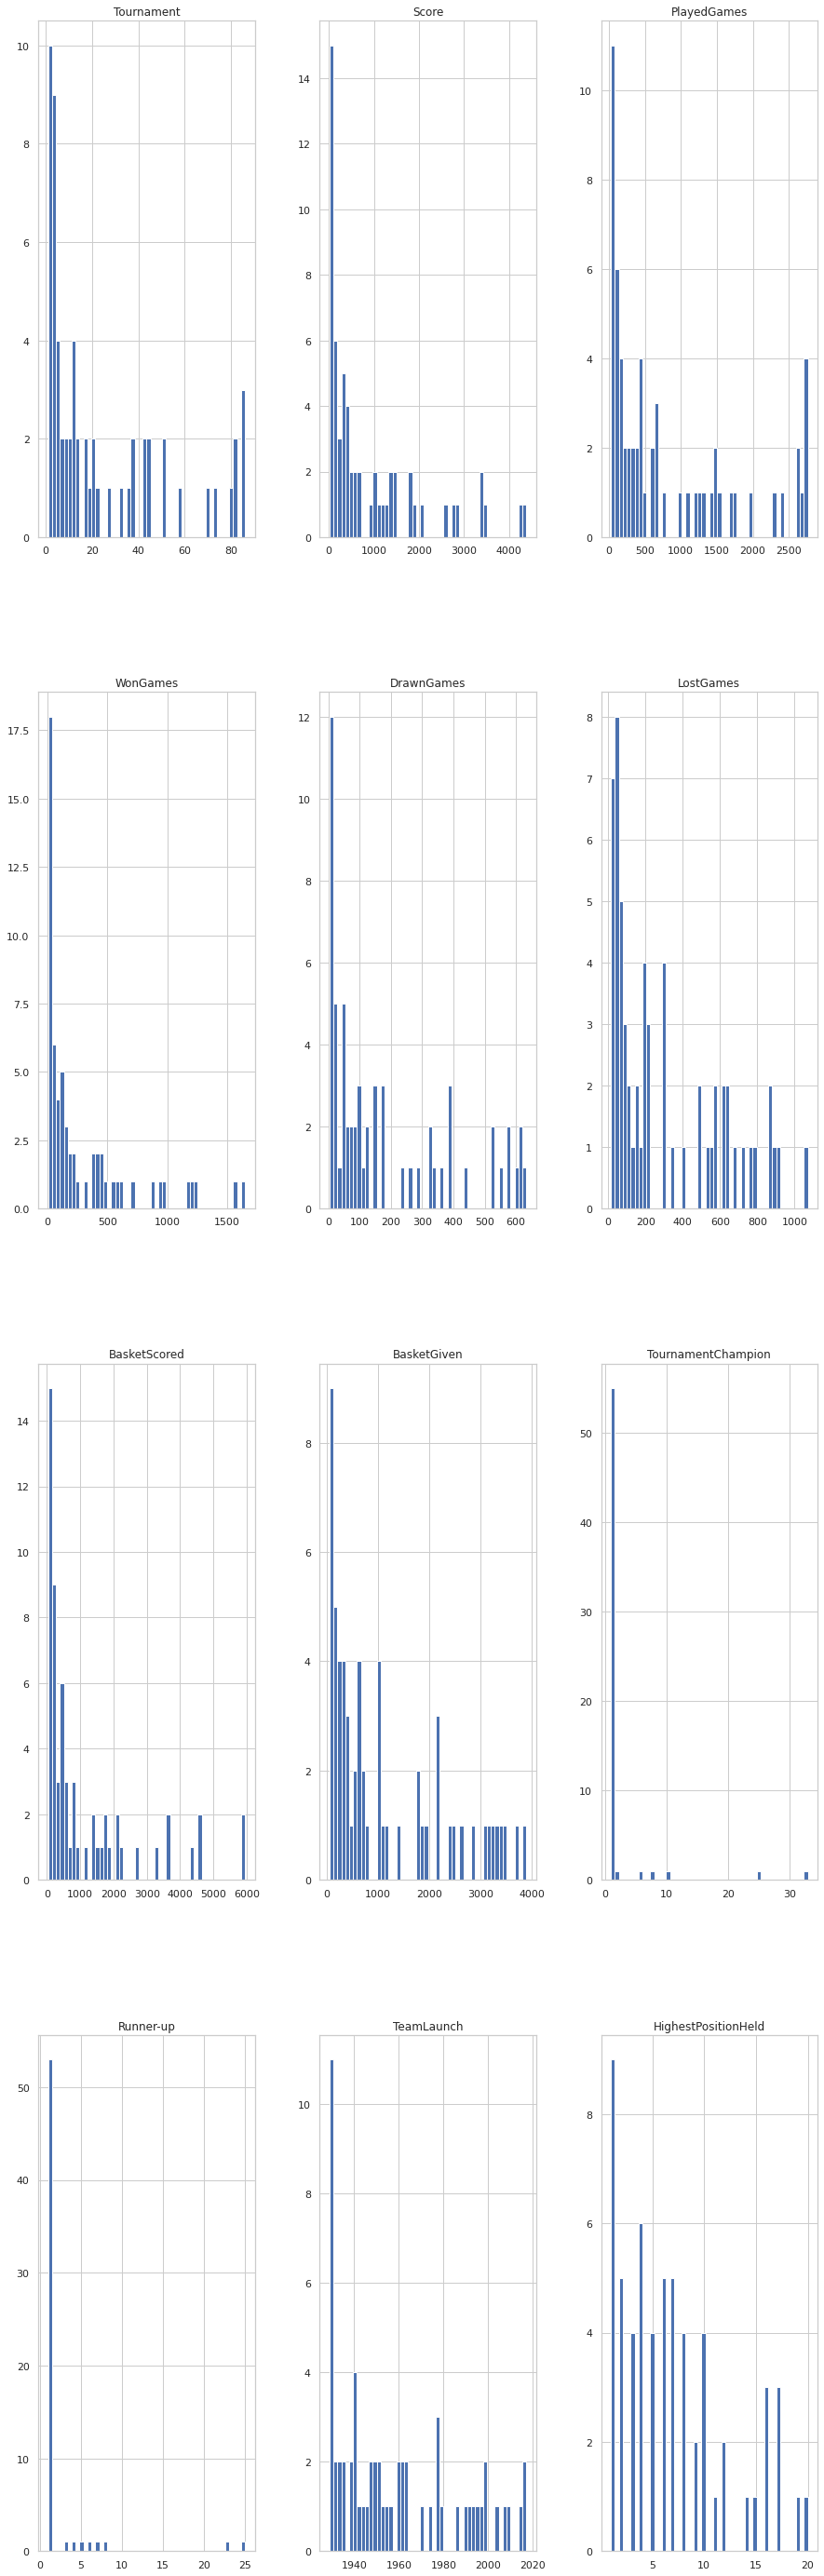

In [236]:

final_basket_ball.hist(bins=50, figsize=(15, 50))

**Idenfiy the trend in the data set**

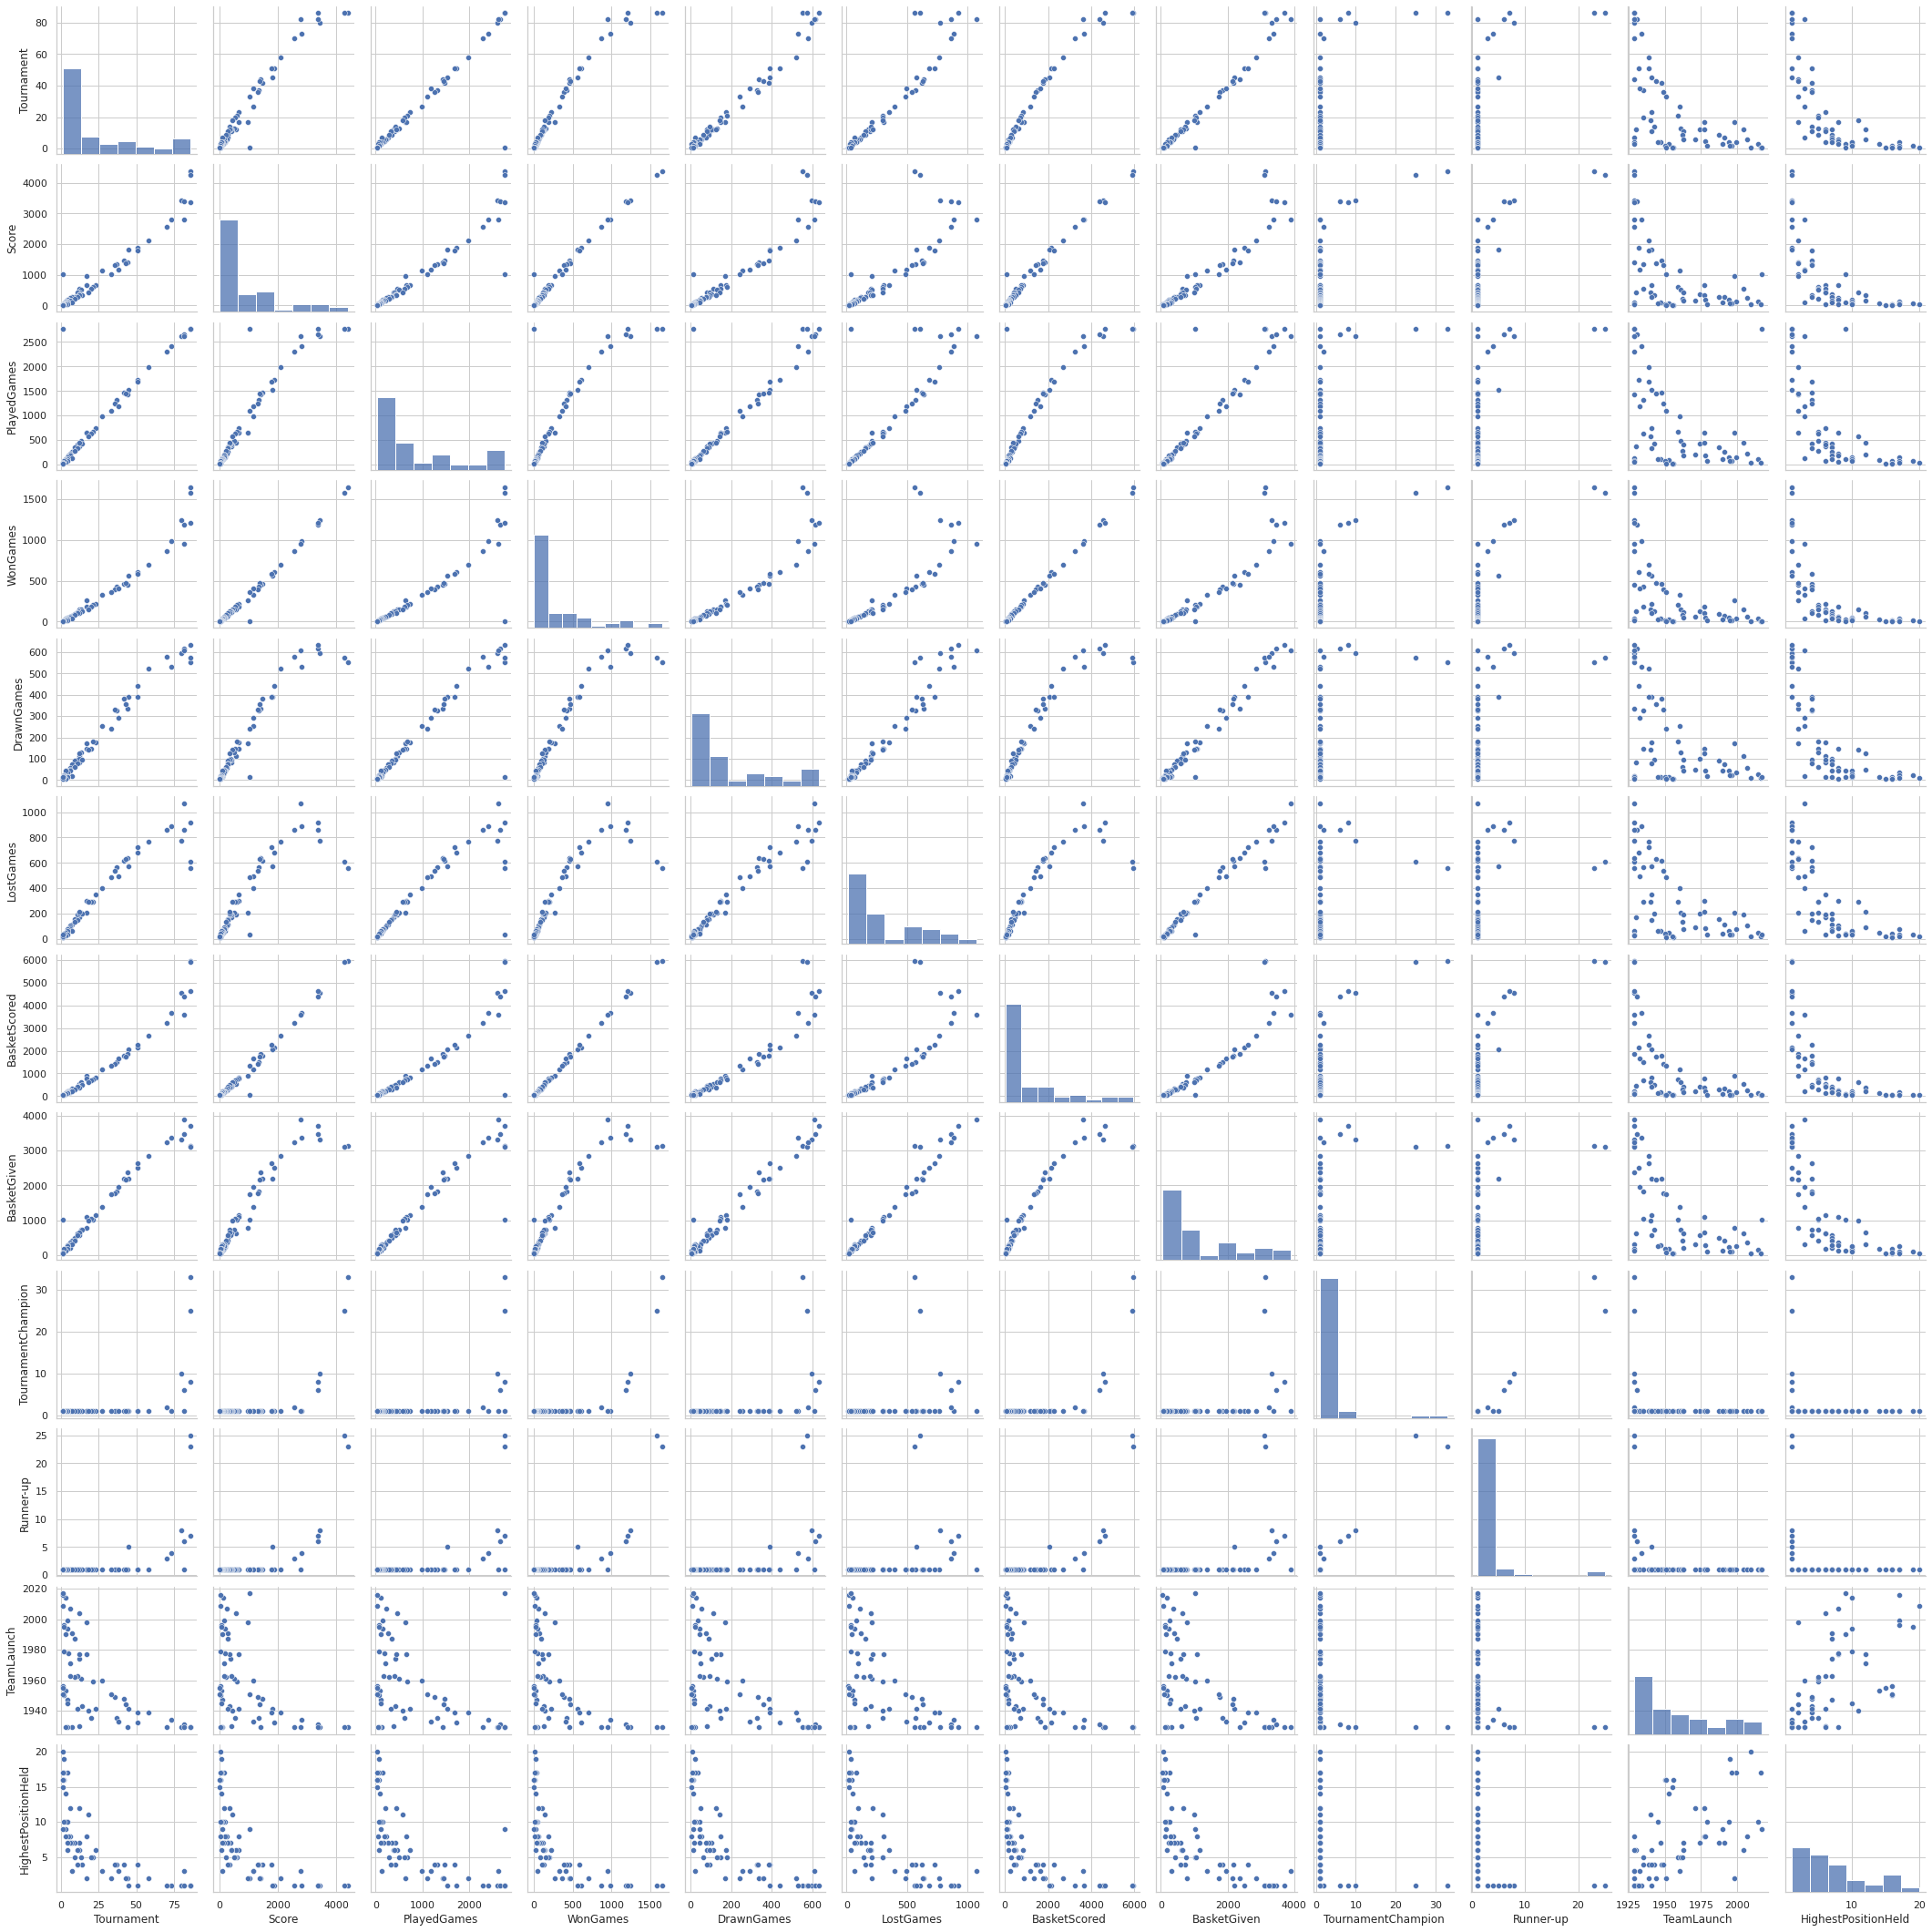

In [237]:
sns.pairplot(final_basket_ball, kind="scatter")


**Detect outliers and five number summary**

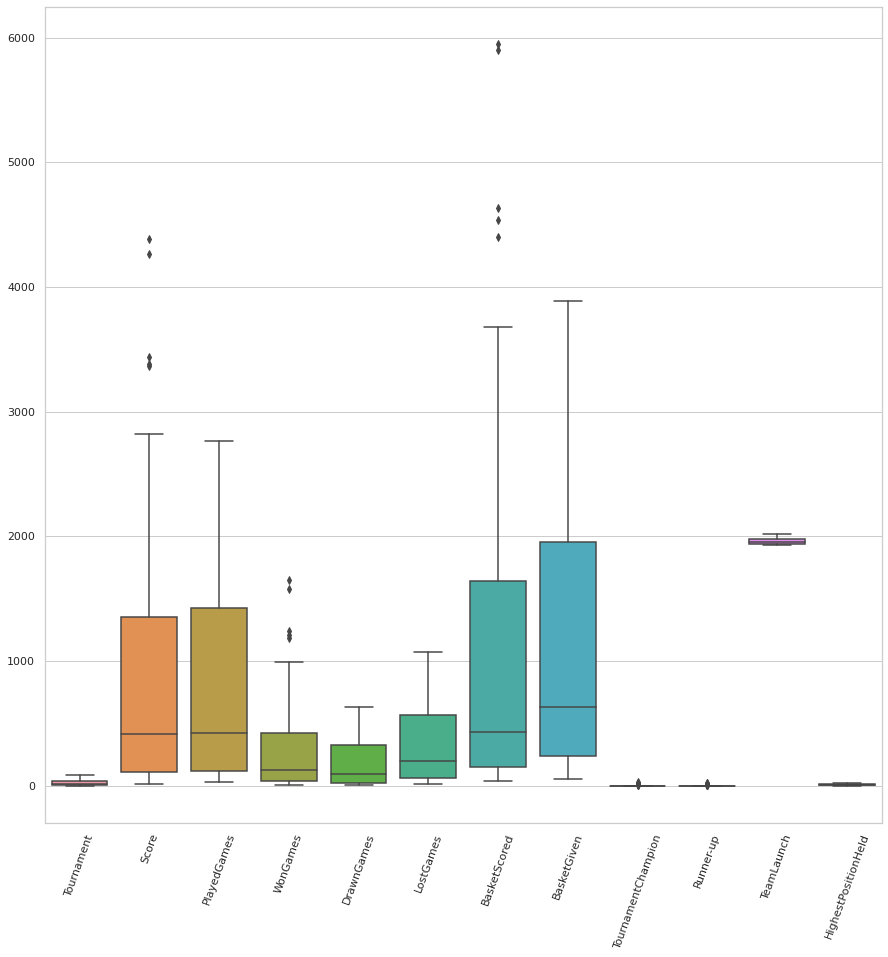

In [238]:
plt.figure(figsize=(15,15))
degrees = 70
plt.xticks(rotation=degrees)
sns.boxplot(data = final_basket_ball, )

**Best Performing team**

In [239]:
best_team = final_basket_ball[final_basket_ball.Score == final_basket_ball.Score.max()].reset_index()
team = best_team["Team"][0]
score = best_team["Score"][0]
print(f"Best performing team is {team} with score {score}")

Best performing team is Team 1 with score 4385


**Poor Performing Team**

In [240]:
poor_team = final_basket_ball[final_basket_ball.Score == final_basket_ball.Score.min()].reset_index()
team = poor_team["Team"][0]
score = poor_team["Score"][0]
print(f"Poor performing team is {team} with score {score}")

Poor performing team is Team 60 with score 14


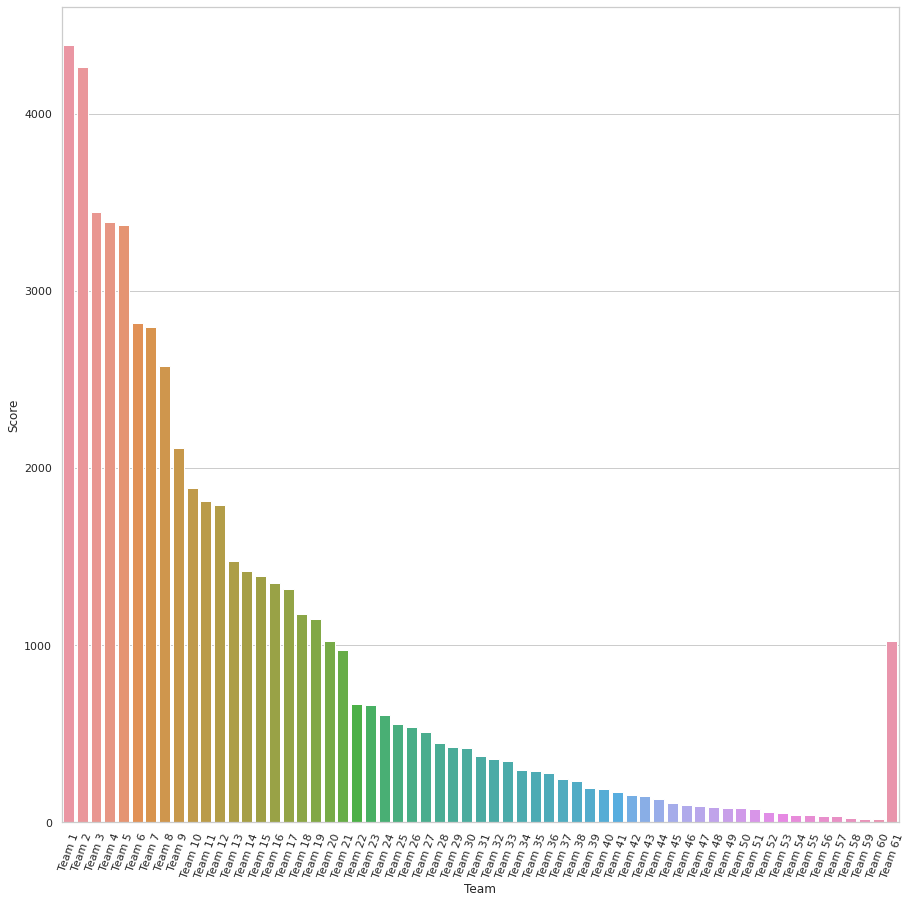

In [241]:
plt.figure(figsize=(15,15))
degrees = 70
plt.xticks(rotation=degrees)
sns.set_theme(style="darkgrid")
ax = sns.barplot(x="Team", y = "Score", data=final_basket_ball)

**Oldest Team**

In [242]:
oldest_team = final_basket_ball[final_basket_ball.TeamLaunch == final_basket_ball.TeamLaunch.min()]
oldest_team

,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld,Team
0,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1,Team 1
1,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1,Team 2
2,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1,Team 3
4,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1,Team 5
6,82,2792,2626,948,608,1070,3609,3889,1,1,1929,3,Team 7
7,70,2573,2302,864,577,861,3228,3230,2,3,1929,1,Team 8
13,44,1416,1428,453,336,639,1843,2368,1,1,1929,2,Team 14
44,7,107,130,43,21,66,227,308,1,1,1929,3,Team 45
51,4,56,72,21,14,37,153,184,1,1,1929,6,Team 52
53,3,42,54,18,6,30,97,131,1,1,1929,8,Team 54


**Newest team**

In [243]:
newest_team = final_basket_ball[final_basket_ball.TeamLaunch == final_basket_ball.TeamLaunch.max()]
newest_team

,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld,Team
60,1,1020,2762,7,14,37,70,1022,1,1,2017,9,Team 61


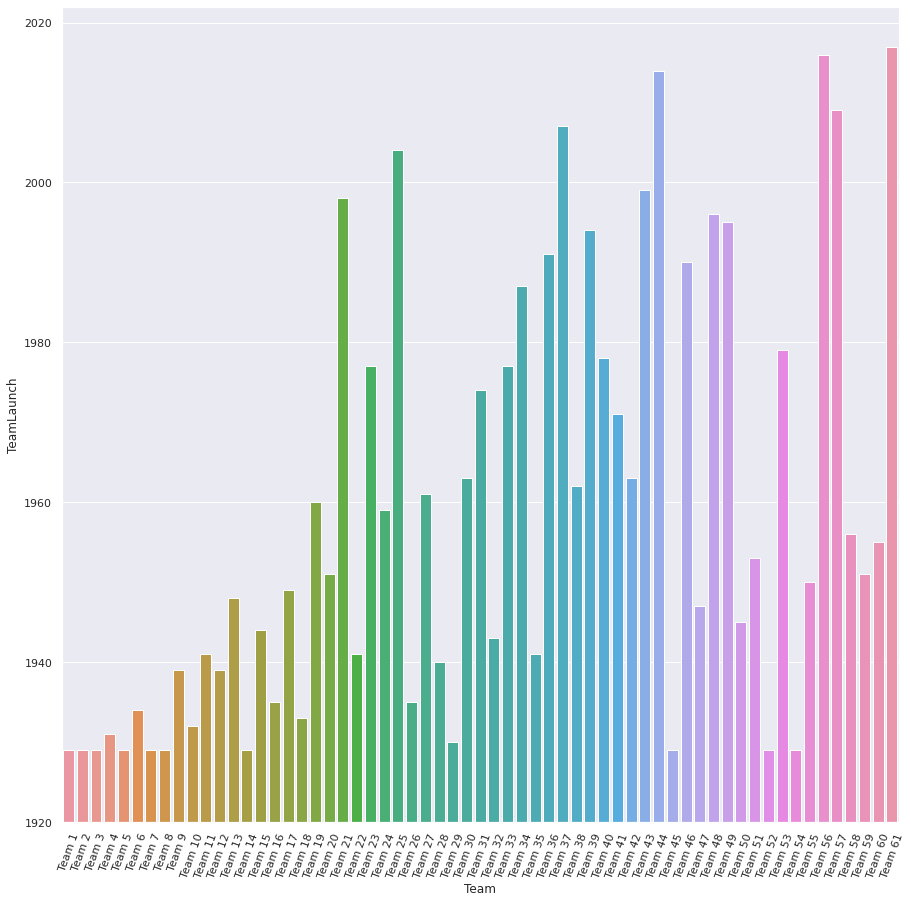

In [244]:
plt.figure(figsize=(15,15))
degrees = 70
plt.xticks(rotation=degrees)
plt.ylim(1920, 2022)
sns.set_theme(style="darkgrid")
ax = sns.barplot(x="Team", y = "TeamLaunch", data=final_basket_ball)

**Highest Goal number of goals by a team**

In [245]:
Highest_goal = final_basket_ball[final_basket_ball.BasketScored == final_basket_ball.BasketScored.max()].reset_index()
team = Highest_goal["Team"][0]
number_of_goals = Highest_goal["BasketScored"][0]
print(f"{team} has done highest number of goals : {number_of_goals}")

Team 1 has done highest number of goals : 5947


**Lowest nummber of goals by a team**

In [246]:
lowest_goal = final_basket_ball[final_basket_ball.BasketScored == final_basket_ball.BasketScored.min()].reset_index()
team = lowest_goal["Team"][0]
number_of_goals = lowest_goal["BasketScored"][0]
print(f"{team} has done lowest number of goals : {number_of_goals}")

Team 60 has done lowest number of goals : 34


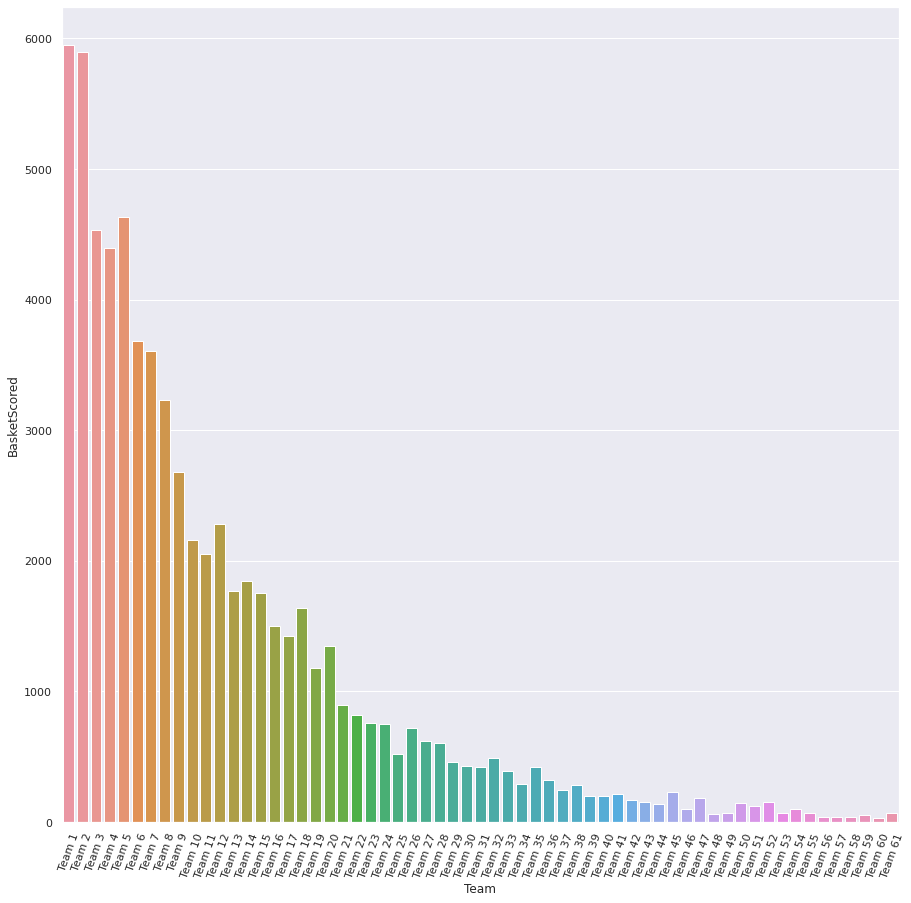

In [247]:
plt.figure(figsize=(15,15))
degrees = 70
plt.xticks(rotation=degrees)
sns.set_theme(style="darkgrid")
ax = sns.barplot(x="Team", y = "BasketScored", data=final_basket_ball)

**Maximum number of wins by a team**

In [248]:
max_win = final_basket_ball[final_basket_ball.WonGames == final_basket_ball.WonGames.max()].reset_index()
team = max_win["Team"][0]
number_of_wins = max_win["WonGames"][0]
print(f"Maximun number of winner team is {team} and the number of matches won is {number_of_wins}")

Maximun number of winner team is Team 1 and the number of matches won is 1647


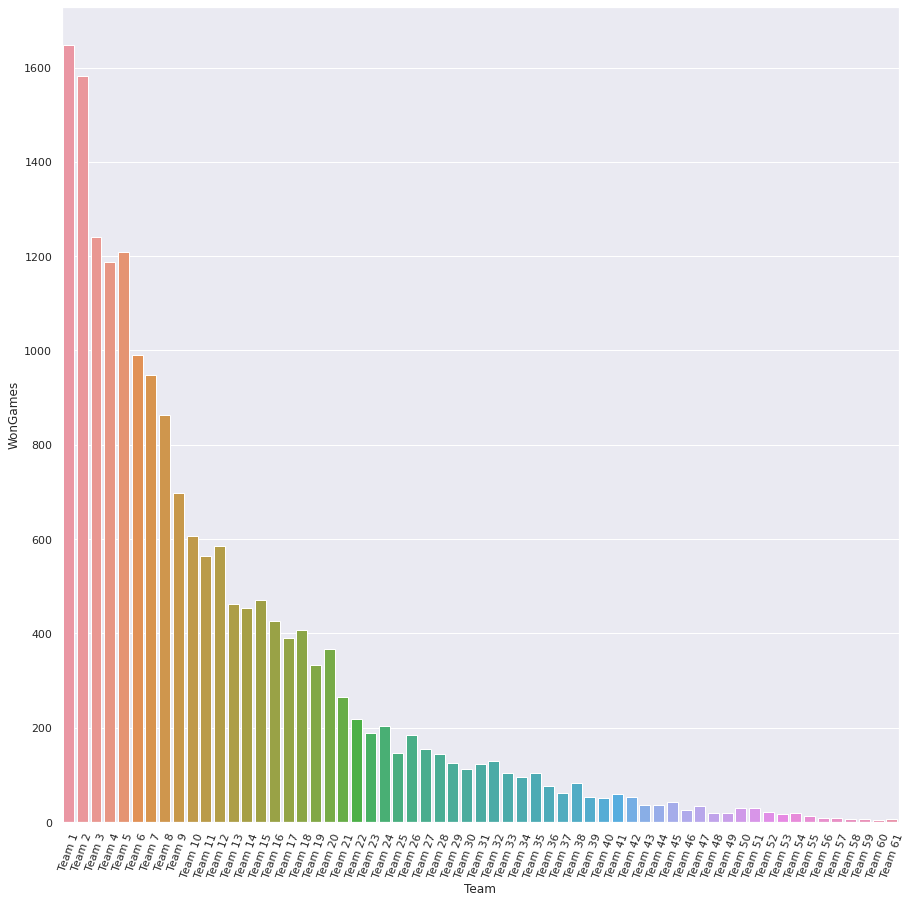

In [249]:
plt.figure(figsize=(15,15))
degrees = 70
plt.xticks(rotation=degrees)
sns.set_theme(style="darkgrid")
ax = sns.barplot(x="Team", y = "WonGames", data=final_basket_ball)

**Maximun number of matches lost by a team**

In [250]:
max_lost = final_basket_ball[final_basket_ball.LostGames == final_basket_ball.LostGames.max()].reset_index()
team = max_lost["Team"][0]
number_of_lost = max_lost["LostGames"][0]
print(f"Maximun number of matches lost by a team is {team} and the number of matches lost is {number_of_lost}")

Maximun number of matches lost by a team is Team 7 and the number of matches lost is 1070


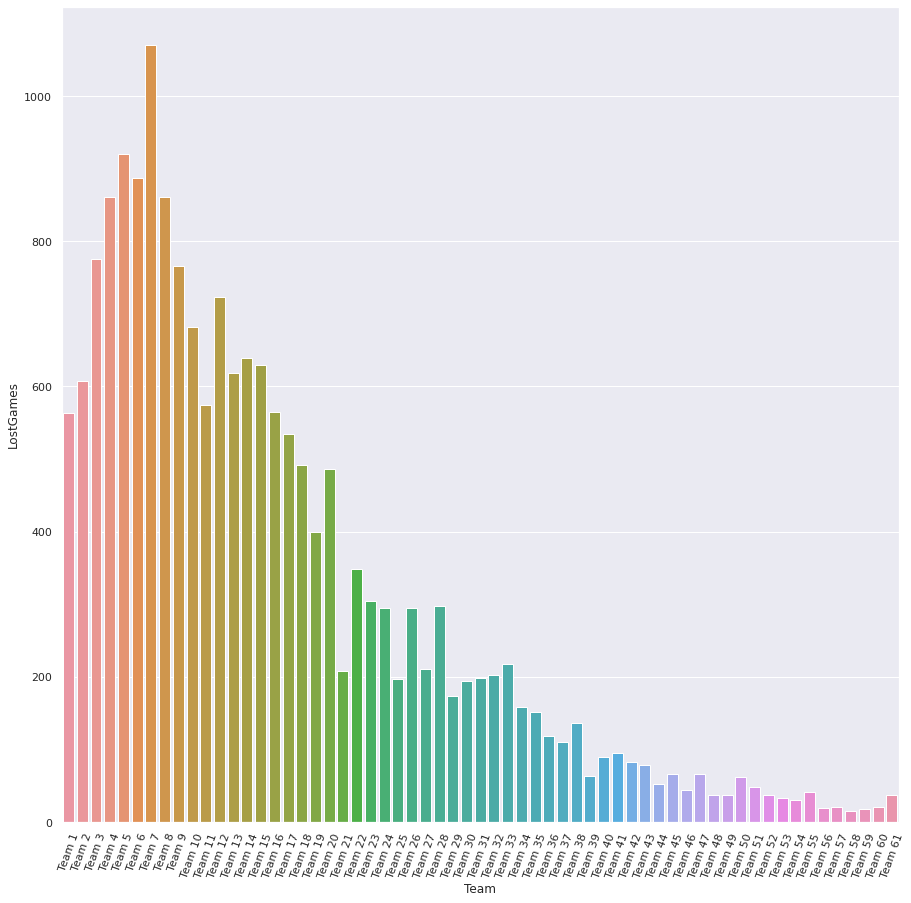

In [251]:
plt.figure(figsize=(15,15))
degrees = 70
plt.xticks(rotation=degrees)
sns.set_theme(style="darkgrid")
ax = sns.barplot(x="Team", y = "LostGames", data=final_basket_ball)

**Maximun number of draw by a team**

In [252]:
max_draw = final_basket_ball[final_basket_ball.DrawnGames == final_basket_ball.DrawnGames.max()].reset_index()
team = max_draw["Team"][0]
number_of_draws = max_draw["DrawnGames"][0]
print(f"Maximun number of draw by a team is {team} and the number of matches draw is {number_of_draws}")

Maximun number of draw by a team is Team 5 and the number of matches draw is 633


**Minumum Number of draw by a team**

In [253]:
min_draw = final_basket_ball[final_basket_ball.DrawnGames == final_basket_ball.DrawnGames.min()].reset_index()
team = min_draw["Team"][0]
number_of_draws = min_draw["DrawnGames"][0]
print(f"Minimum number of draw by a team is {team} and the number of matches draw is {number_of_draws}")

Minimum number of draw by a team is Team 60 and the number of matches draw is 4


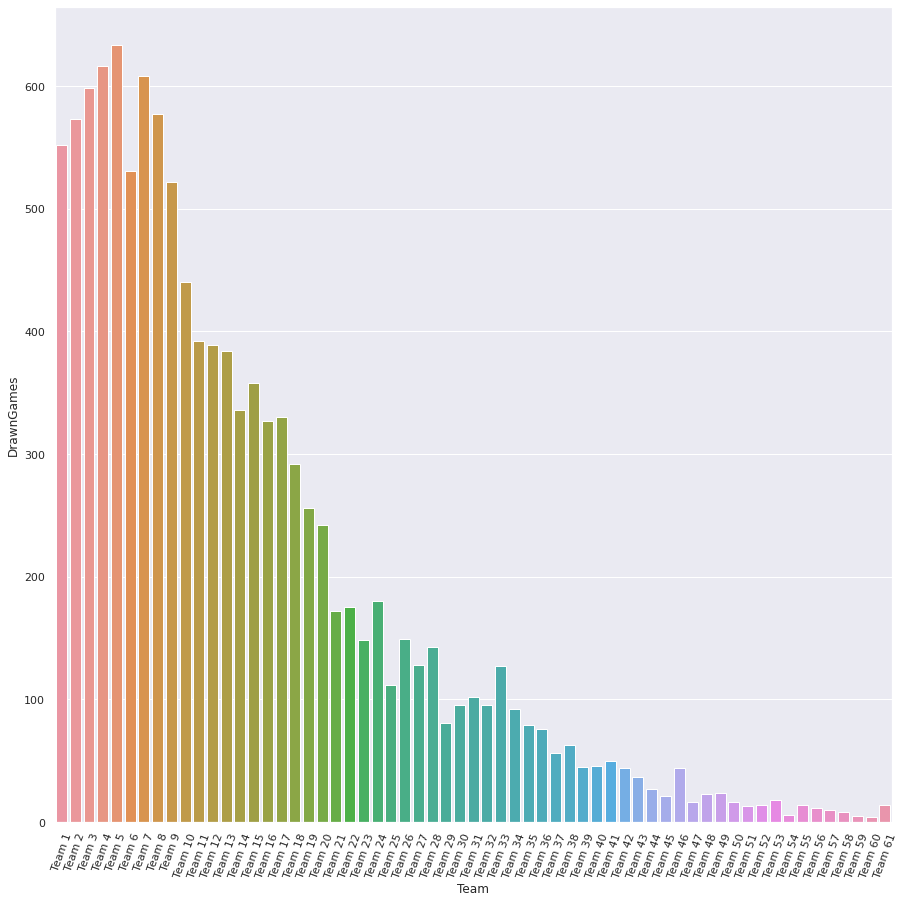

In [254]:
plt.figure(figsize=(15,15))
degrees = 70
plt.xticks(rotation=degrees)
sns.set_theme(style="darkgrid")
ax = sns.barplot(x="Team", y = "DrawnGames", data=final_basket_ball)

**Highest position held and runner up percentage**

In [255]:
position_percentage = pd.DataFrame()
position_percentage["Team"] = final_basket_ball["Team"]
position_percentage["Tournament"] = final_basket_ball["Tournament"]
position_percentage["HighestPositionHeld"] = final_basket_ball["HighestPositionHeld"]
position_percentage["Runner-up"] = final_basket_ball["Runner-up"]

position_percentage["highest_position_held_percentage"] = (final_basket_ball["HighestPositionHeld"]/final_basket_ball["Tournament"]) * 100
position_percentage["runner_up_percentage"] = (final_basket_ball["Runner-up"]/final_basket_ball["Tournament"]) * 100

position_percentage

,Team,Tournament,HighestPositionHeld,Runner-up,highest_position_held_percentage,runner_up_percentage
0,Team 1,86,1,23,1.162791,26.744186
1,Team 2,86,1,25,1.162791,29.069767
2,Team 3,80,1,8,1.250000,10.000000
3,Team 4,82,1,6,1.219512,7.317073
4,Team 5,86,1,7,1.162791,8.139535
...,...,...,...,...,...,...
56,Team 57,1,20,1,2000.000000,100.000000
57,Team 58,1,16,1,1600.000000,100.000000
58,Team 59,1,16,1,1600.000000,100.000000
59,Team 60,1,15,1,1500.000000,100.000000


**Maximum and minimum numbers tournament played by a team**

In [256]:
max_tournamnet = final_basket_ball[final_basket_ball.Tournament == final_basket_ball.Tournament.max()]
max_tournamnet


,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld,Team
0,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1,Team 1
1,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1,Team 2
4,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1,Team 5


In [257]:
min_tournamnet = final_basket_ball[final_basket_ball.Tournament == final_basket_ball.Tournament.min()]
min_tournamnet

,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld,Team
55,1,35,38,8,11,19,36,55,1,1,2016,17,Team 56
56,1,34,38,8,10,20,38,66,1,1,2009,20,Team 57
57,1,22,30,7,8,15,37,57,1,1,1956,16,Team 58
58,1,19,30,7,5,18,51,85,1,1,1951,16,Team 59
59,1,14,30,5,4,21,34,65,1,1,1955,15,Team 60
60,1,1020,2762,7,14,37,70,1022,1,1,2017,9,Team 61


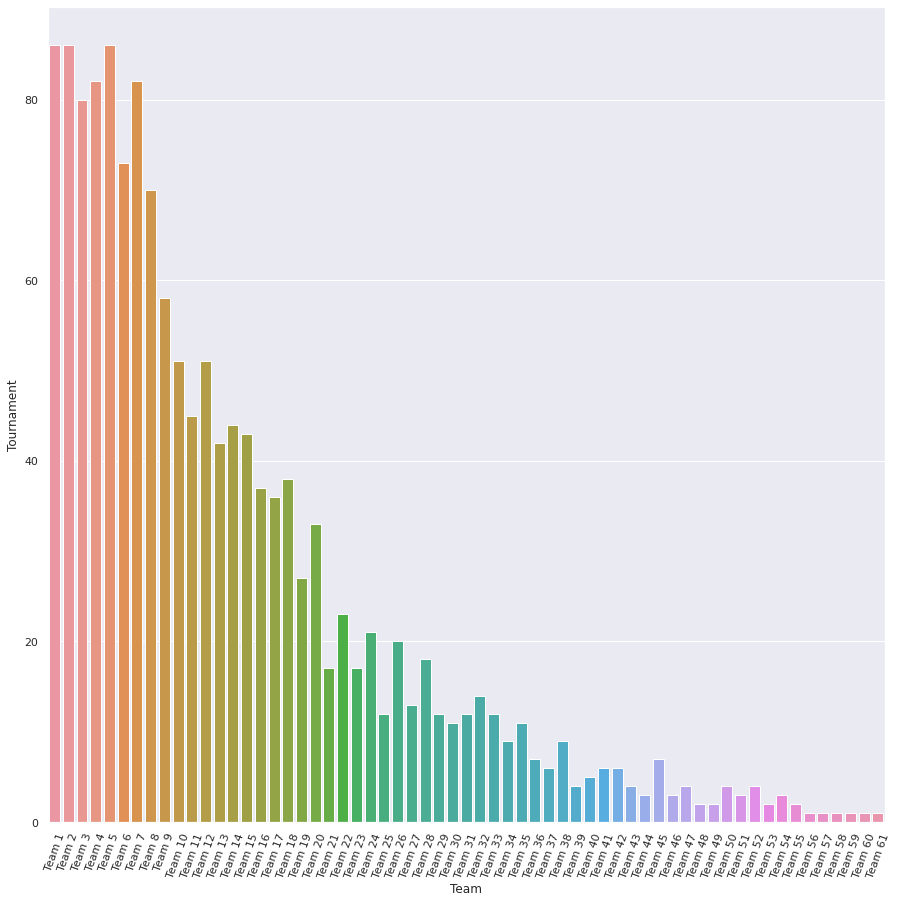

In [258]:
plt.figure(figsize=(15,15))
degrees = 70
plt.xticks(rotation=degrees)
sns.set_theme(style="darkgrid")
ax = sns.barplot(x="Team", y = "Tournament", data=final_basket_ball)

**Tournament Win by a team and percentage win**

In [259]:
tor_win_percent = final_basket_ball["TournamentChampion"]/final_basket_ball["Tournament"] * 100

tor_win_percent_df = final_basket_ball.loc[: , ("Team", "Tournament", "TournamentChampion")]
tor_win_percent_df["TournamentChampion%"] = tor_win_percent
tor_win_percent_df

,Team,Tournament,TournamentChampion,TournamentChampion%
0,Team 1,86,33,38.372093
1,Team 2,86,25,29.069767
2,Team 3,80,10,12.500000
3,Team 4,82,6,7.317073
4,Team 5,86,8,9.302326
...,...,...,...,...
56,Team 57,1,1,100.000000
57,Team 58,1,1,100.000000
58,Team 59,1,1,100.000000
59,Team 60,1,1,100.000000


In [260]:
corr = final_basket_ball.corr()
corr

,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
Tournament,1.000000,0.973750,0.923071,0.971914,0.989429,0.949997,0.974949,0.983195,0.561192,0.610386,-0.603151,-0.708071
Score,0.973750,1.000000,0.944795,0.991533,0.950547,0.871156,0.991194,0.943448,0.688589,0.733408,-0.514498,-0.667864
PlayedGames,0.923071,0.944795,1.000000,0.899445,0.917993,0.879657,0.902702,0.947237,0.516739,0.563366,-0.461163,-0.669607
WonGames,0.971914,0.991533,0.899445,1.000000,0.939912,0.852873,0.999315,0.922894,0.727831,0.768941,-0.543363,-0.648661
DrawnGames,0.989429,0.950547,0.917993,0.939912,1.000000,0.973137,0.942640,0.987717,0.474144,0.527560,-0.575774,-0.720177
LostGames,0.949997,0.871156,0.879657,0.852873,0.973137,1.000000,0.859114,0.979808,0.296056,0.351418,-0.597303,-0.725861
BasketScored,0.974949,0.991194,0.902702,0.999315,0.942640,0.859114,1.000000,0.928379,0.718978,0.761933,-0.552130,-0.649543
BasketGiven,0.983195,0.943448,0.947237,0.922894,0.987717,0.979808,0.928379,1.000000,0.443062,0.494415,-0.589529,-0.727144
TournamentChampion,0.561192,0.688589,0.516739,0.727831,0.474144,0.296056,0.718978,0.443062,1.000000,0.971818,-0.268189,-0.285193
Runner-up,0.610386,0.733408,0.563366,0.768941,0.527560,0.351418,0.761933,0.494415,0.971818,1.000000,-0.297408,-0.325799


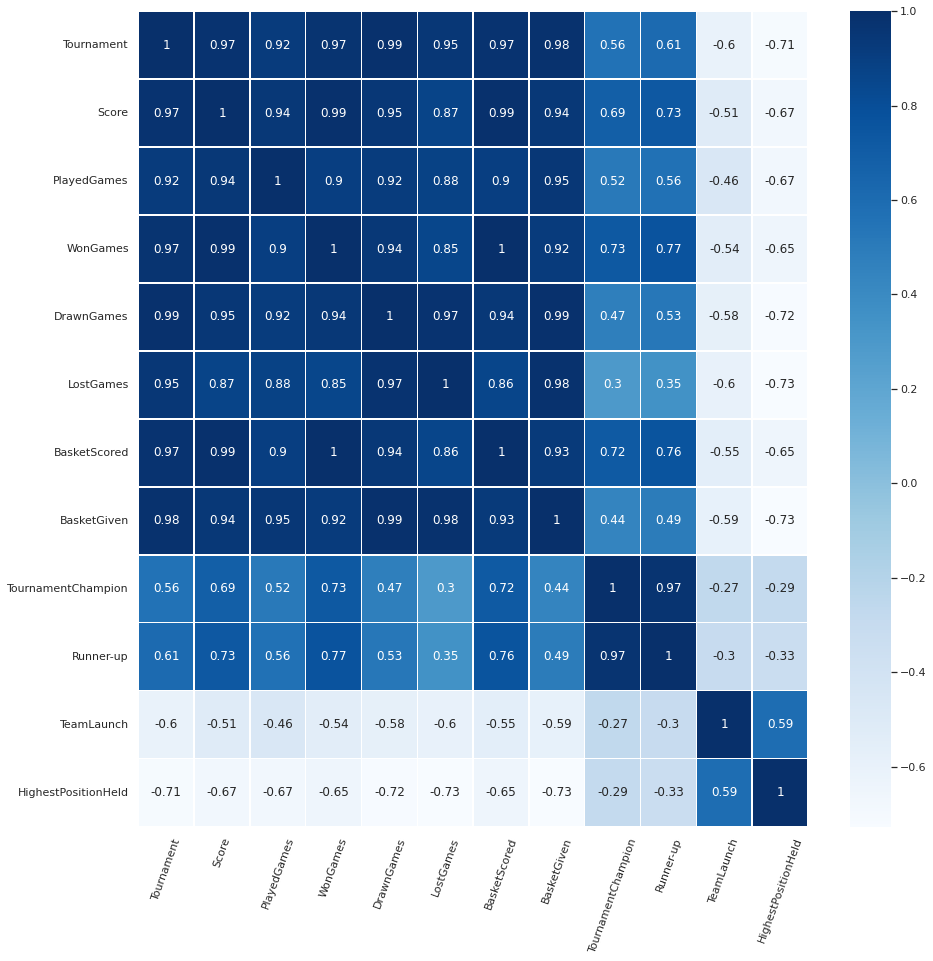

In [261]:
corr = final_basket_ball.corr()
plt.figure(figsize=(15,15))
degrees = 70
plt.xticks(rotation=degrees)
hm = sns.heatmap(corr, linewidths=.5, annot=True, cmap="Blues")

**Improvements**

**Data Quality**


> Improved data quality leads to better decision-making . The more high-quality data we have, the more confidence we can be  in our decisions. Good data decreases risk and can result in consistent improvements in results.

> The Given basket ball data has lots of missing value specially in TournamentChampion, Runner-up.

> TeamLaunch column have inconsitance data.


**Suggestion**
> The data collection process should be improve to get clean data


**Data Quantity**
> The larger amount of available information helps the data analysis process to improve business decision making.

> The given basket ball data have limited amount of data(only 61 records) which is not be a good amount of data to be analysed for bussinss insights

**Suggestion**
The data collection team/tool need to collect larger amount of data

**Variety**
> Variety  refers to heterogeneous sources.

**Suggestion** 
> The data collection tool should collect data from multiple sources that would help us to get diversified data and help to indenfy better pattern in the data set.


**Velocity**
> Velocity refers to the high speed of accumulation of data.

**Suggestion**
> We should have automated and efficient way t accumulate the data that would help to solve our data quantity issue. 

> Some example of efficient data collection sources are machines, networks, social media, mobile phones.


**Veracity**

> Data veracity, in general, is how accurate or truthful a data set may be. More specifically, when it comes to the accuracy of big data, it's not just the quality of the data itself but how trustworthy the data source, type, and processing of it is

**Suggestion**
> When we have missing value in the data set and we have to treat it with mean, median or mode. we are actually compromsing with Veracity of the data set.

**Part C**

## 1. Read the CSV file.

In [262]:
# The the data file
original_data = pd.read_csv("CompanyX_EU.csv")

In [263]:
start_up.head()

,Startup,Product,Funding,Event,Result,OperatingState,Funds_in_million
1,3DLT,3dlt.com,$630K,Disrupt NYC 2013,Contestant,Closed,0.63
3,3Dprintler,3dprintler.com,$1M,Disrupt NY 2016,Audience choice,Operating,1.00
5,5to1,5to1.com,$19.3M,TC50 2009,Contestant,Acquired,19.30
10,AdhereTech,adheretech.com,$1.8M,Hardware Battlefield 2014,Contestant,Operating,1.80
11,AdRocket,adrocket.com,$1M,TC50 2008,Contestant,Closed,1.00


## Get the size of data set

In [264]:
original_data.shape

(662, 6)

## 2. Data Exploration


***A. Check the datatypes of each attribute.***

In [265]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662 entries, 0 to 661
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Startup         662 non-null    object
 1   Product         656 non-null    object
 2   Funding         448 non-null    object
 3   Event           662 non-null    object
 4   Result          662 non-null    object
 5   OperatingState  662 non-null    object
dtypes: object(6)
memory usage: 31.2+ KB


*Each of the attribute in the given data set is o object type*

***B. Check for null values in the attributes.***

In [266]:
original_data.isnull().sum()

Startup             0
Product             6
Funding           214
Event               0
Result              0
OperatingState      0
dtype: int64

*There are 6 nulls values in attribute Product and 214 nulls values in Funding attribute*

## 3. Data preprocessing & visualisation:

***A. Drop the null values.***

In [267]:
start_up = original_data.dropna().copy(deep=True) 
start_up.head()

,Startup,Product,Funding,Event,Result,OperatingState
1,3DLT,3dlt.com,$630K,Disrupt NYC 2013,Contestant,Closed
3,3Dprintler,3dprintler.com,$1M,Disrupt NY 2016,Audience choice,Operating
5,5to1,5to1.com,$19.3M,TC50 2009,Contestant,Acquired
6,8 Securities,8securities.com,$29M,Disrupt Beijing 2011,Finalist,Operating
10,AdhereTech,adheretech.com,$1.8M,Hardware Battlefield 2014,Contestant,Operating


***B. Convert the ‘Funding’ features to a numerical value.***

In [268]:
start_up.loc[:,'Funds_in_million'] = start_up['Funding'].apply(lambda x: float(x[1:-1])/1000 if x[-1] == 'K' else (float(x[1:-1])*1000 if x[-1] == 'B' else float(x[1:-1])))
start_up.head()

,Startup,Product,Funding,Event,Result,OperatingState,Funds_in_million
1,3DLT,3dlt.com,$630K,Disrupt NYC 2013,Contestant,Closed,0.63
3,3Dprintler,3dprintler.com,$1M,Disrupt NY 2016,Audience choice,Operating,1.00
5,5to1,5to1.com,$19.3M,TC50 2009,Contestant,Acquired,19.30
6,8 Securities,8securities.com,$29M,Disrupt Beijing 2011,Finalist,Operating,29.00
10,AdhereTech,adheretech.com,$1.8M,Hardware Battlefield 2014,Contestant,Operating,1.80


***C. Plot box plot for funds in million.***

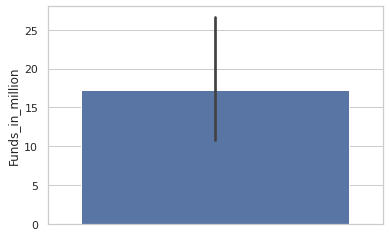

In [269]:

sns.set_theme(style="whitegrid")
sns.barplot(y = "Funds_in_million", data = start_up)

***D. Check the number of outliers greater than the upper fence***

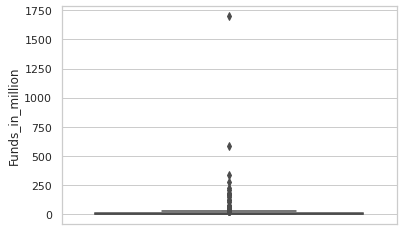

In [270]:

sns.boxplot(y = "Funds_in_million", data = start_up, fliersize=5)

In [271]:
Q1 = start_up.quantile(0.25)
Q3 = start_up.quantile(0.75)
IQR = Q3 - Q1

In [272]:
outliers = (start_up > (Q3 + 1.5 * IQR))["Funds_in_million"].sum()
print(f"Number of outliers greater than the upper fence - {outliers}")

Number of outliers greater than the upper fence - 60


In [273]:
start_up[start_up.Funds_in_million > outliers]

,Startup,Product,Funding,Event,Result,OperatingState,Funds_in_million
56,Betterment,betterment.com,$205M,Disrupt NYC 2010,Finalist,Operating,205.0
113,Cloudflare,cloudflare.com,$182.1M,Disrupt SF 2010,Runner up,Operating,182.1
138,DataSift,datasift.com,$72M,Disrupt SF 2010,Finalist,Operating,72.0
139,DataXu,dataxu.com,$64M,TC50 2009,Contestant,Operating,64.0
154,Dropbox,dropbox.com,$1.7B,TC50 2008,Contestant,Operating,1700.0
188,Fitbit,fitbit.com,$66M,TC50 2008,Finalist,Ipo,66.0
209,Getaround,getaround.com,$103M,Disrupt NYC 2011,Winner,Operating,103.0
271,Ionic Security,ionicsecurity.com,$122.4M,Disrupt SF 2012,Contestant,Operating,122.4
279,Jiff,jiff.com,$67.8M,Disrupt SF 2011,Contestant,Acquired,67.8
282,Kaltura,kaltura.com,$166.1M,TC40 2007,Audience choice,Operating,166.1


The above 60 companies have been funded excessively.

***Removing the data having outliers ***

In [274]:
upper_fence = (Q3 + 1.5 * IQR)[0]
start_up.drop(start_up[start_up.Funds_in_million > upper_fence].index, inplace = True)

In [275]:
start_up.head()

,Startup,Product,Funding,Event,Result,OperatingState,Funds_in_million
1,3DLT,3dlt.com,$630K,Disrupt NYC 2013,Contestant,Closed,0.63
3,3Dprintler,3dprintler.com,$1M,Disrupt NY 2016,Audience choice,Operating,1.00
5,5to1,5to1.com,$19.3M,TC50 2009,Contestant,Acquired,19.30
10,AdhereTech,adheretech.com,$1.8M,Hardware Battlefield 2014,Contestant,Operating,1.80
11,AdRocket,adrocket.com,$1M,TC50 2008,Contestant,Closed,1.00


***E. Check frequency of the OperatingState features classes.***

In [276]:
start_up.OperatingState.value_counts()

Operating    275
Closed        56
Acquired      55
Name: OperatingState, dtype: int64

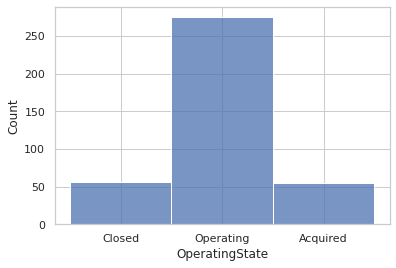

In [277]:
sns.histplot(x = "OperatingState", data = start_up)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


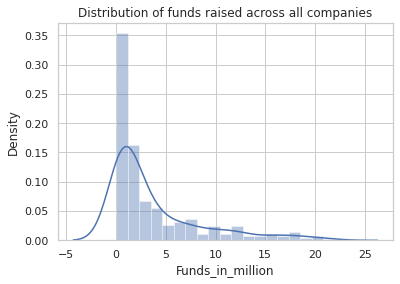

In [278]:
sns.distplot(start_up.Funds_in_million)
plt.title('Distribution of funds raised across all companies')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


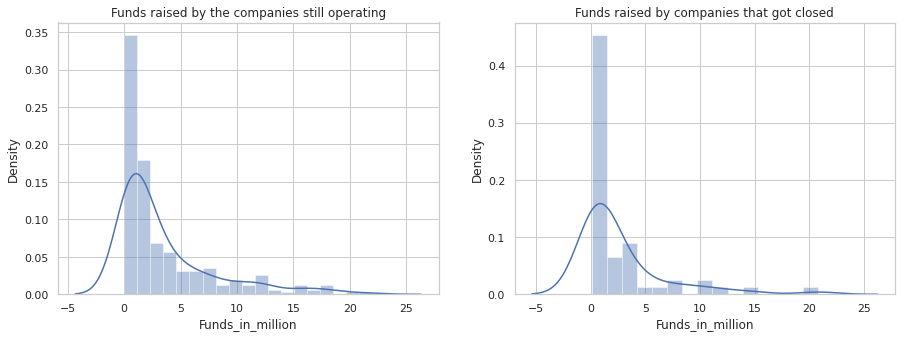

In [279]:
fig, ax = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

sns.distplot(start_up.loc[start_up.OperatingState == 'Operating', 'Funds_in_million'], ax = ax[0])
sns.distplot(start_up.loc[start_up.OperatingState =='Closed', 'Funds_in_million'], ax = ax[1])

ax[0].set_title('Funds raised by the companies still operating')
ax[1].set_title('Funds raised by companies that got closed')
plt.show()

In [280]:
start_up.Funds_in_million.describe()

count    386.00000
mean       3.72514
std        4.73236
min        0.00500
25%        0.60000
50%        1.70000
75%        5.00000
max       22.00000
Name: Funds_in_million, dtype: float64

75% of the companies have less than 5 million raised funds

## 4. Statistical Analysis

***A. Is there any significant difference between Funds raised by companies that are still operating vs companies that closed down?***

In [281]:
start_up.groupby(by=["OperatingState"]).Funds_in_million.sum()

OperatingState
Acquired     320.2510
Closed       150.2157
Operating    967.4372
Name: Funds_in_million, dtype: float64

Yes, there is significant difference between Funds raised by companies that are still operating vs companies that closed down

***B. Write the null hypothesis and alternative hypothesis.***

Null hypothesis: 
> H0: there is **NO significant** difference between mean of Funds raised by companies that are still operating vs mean of companies that closed down

Alternate hypothesis: 
> Ha: there is **significant** difference between mean of Funds raised by companies that are still operating vs mean of companies that closed down

***C. Test for significance and conclusion***

**Z-Test**

In [282]:
from statsmodels.stats.weightstats import ztest

sample1 = start_up.loc[start_up.OperatingState == 'Operating', 'Funds_in_million']
sample2 = start_up.loc[start_up.OperatingState =='Closed', 'Funds_in_million']

alpha = 0.05   # Let's consider a significance level of 5%

test_statistic, p_value = ztest(sample1, sample2)

if p_value <= alpha:
    print(f'Since the p-value, {round(p_value, 3)} < {alpha} (alpha) the difference is significant and we reject the Null hypothesis')
else:
    print(f'''\t Since the p-value, {round(p_value,3)} > {alpha} (alpha) the difference is not significant and,
    \t we fail to reject the Null hypothesis''')

	 Since the p-value, 0.192 > 0.05 (alpha) the difference is not significant and,
    	 we fail to reject the Null hypothesis


**2 Sampl t-test**

In [283]:
from scipy.stats import ttest_ind

test_statistic, p_value = ttest_ind(sample1, sample2)

if p_value <= alpha:
    print(f'Since the p-value, {round(p_value, 3)} < {alpha} (alpha) the difference is significant and we reject the Null hypothesis')
else:
    print(f'''\t Since the p-value, {round(p_value,3)} > {alpha} (alpha) the difference is not significant and,
    \t we fail to reject the Null hypothesis''')

	 Since the p-value, 0.193 > 0.05 (alpha) the difference is not significant and,
    	 we fail to reject the Null hypothesis


**From the tests above we found no evidence to state that the companies that have raised more money tend to suceed more or vice-versa**

***D. Make a copy of the original data frame.***

In [284]:
coppied_data = original_data.copy(deep = True)
coppied_data.head()

,Startup,Product,Funding,Event,Result,OperatingState
0,2600Hz,2600hz.com,NaN,Disrupt SF 2013,Contestant,Operating
1,3DLT,3dlt.com,$630K,Disrupt NYC 2013,Contestant,Closed
2,3DPrinterOS,3dprinteros.com,NaN,Disrupt SF 2016,Contestant,Operating
3,3Dprintler,3dprintler.com,$1M,Disrupt NY 2016,Audience choice,Operating
4,42 Technologies,42technologies.com,NaN,Disrupt NYC 2013,Contestant,Operating


***E. Check frequency distribution of Result variables.***

In [285]:
coppied_data.Result.value_counts()

Contestant         488
Finalist            84
Audience choice     41
Winner              26
Runner up           23
Name: Result, dtype: int64

***Winner and contestants***

In [286]:
winners = coppied_data.Result.value_counts()[1:].sum()

contestants = coppied_data.Result.value_counts()['Contestant']
winners, contestants

(174, 488)

***F. Calculate percentage of winners that are still operating and percentage of contestants that are still operating***

In [287]:
contestants_operating = coppied_data.OperatingState[coppied_data.Result == 'Contestant'].value_counts().loc['Operating']
winners_operating = coppied_data.OperatingState[coppied_data.Result != 'Contestant'].value_counts().loc['Operating']
contestants_operating, winners_operating

(332, 133)

In [288]:
print(f"percentage of winners that are still operating: {winners_operating/winners} and percentage of contestants that are still operating: {contestants_operating/contestants}")

percentage of winners that are still operating: 0.764367816091954 and percentage of contestants that are still operating: 0.680327868852459


***G. Write your hypothesis comparing the proportion of companies that are operating between winners and contestants***

Null hyputhesis (Ho): The proportion of companies that are operating is the same in both categories - winners and contestants

Alternative hypothesis (Ha): The proportion of companies that are operating is significantly different from each other, among the two categories

In [289]:
from statsmodels.stats.proportion import proportions_ztest

test_statistic, p_value = proportions_ztest([contestants_operating, winners_operating], [contestants, winners])

if p_value <= alpha:
    print(f'Since the p-value, {round(p_value, 3)} < {alpha} (alpha) the difference is significant and we reject the Null hypothesis')
else:
    print(f'''\t Since the p-value, {round(p_value,3)} > {alpha} (alpha) the difference is not significant and,
    \t we fail to reject the Null hypothesis''')

Since the p-value, 0.037 < 0.05 (alpha) the difference is significant and we reject the Null hypothesis


**Conclusion:**
> The amount of funds a company raises is not a significant factor in deciding if the company will remain operational or close down
Winners in the Startup ecosystem battle have proven to remain operational more so, than the companies that came out only as contestants

***I. Select only the Event that has ‘disrupt’ keyword from 2013 onwards***

In [290]:

events = coppied_data[coppied_data.Event.apply(lambda x: 'Disrupt' in x and int(x[-4:]) >= 2013)].Event
events

0          Disrupt SF 2013
1         Disrupt NYC 2013
2          Disrupt SF 2016
3          Disrupt NY 2016
4         Disrupt NYC 2013
              ...         
646    Disrupt London 2015
648    Disrupt London 2015
653        Disrupt EU 2014
656       Disrupt NYC 2013
660        Disrupt SF 2013
Name: Event, Length: 276, dtype: object